In [14]:
import numpy as np
import SIR_python
import matplotlib.pyplot as plt

In [ ]:

S0 = 9950
I0 = 50
R0 = 0
beta = 0.2
gamma = 0.1

time_days = 100
dt = 2.04081633/4

numsteps = int(time_days / dt)
return_every = 4

In [63]:
test = SIR_python.integrate_system(S0, I0, R0, beta, gamma, dt,numsteps, return_every)

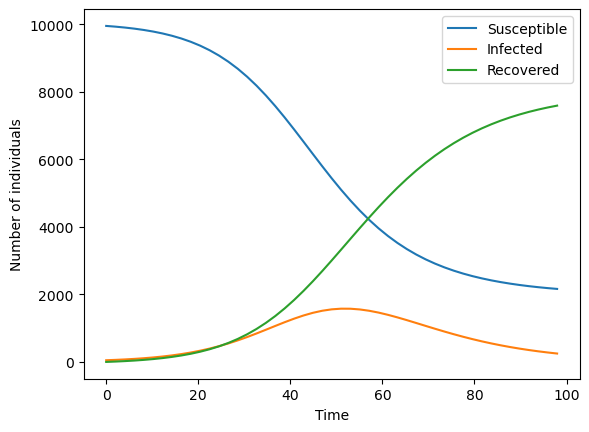

In [64]:
plt.plot(test[:,0], test[:,1], label="Susceptible")
plt.plot(test[:,0], test[:,2], label="Infected")
plt.plot(test[:,0], test[:,3], label="Recovered")
plt.xlabel("Time")
plt.ylabel("Number of individuals")
plt.legend()


___
 Now doing the fit

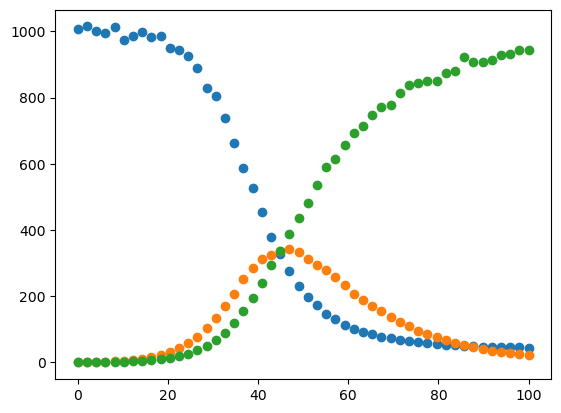

In [65]:
data = np.genfromtxt("/Users/jeppegrejspetersen/Code/HPPC/hpc_course_fork/module1/jeppe/python_integration/Unknown_SIR_data.csv", delimiter=",", skip_header=1)
time_data = data[:,0]
S_data = data[:,1]
I_data = data[:,2]
R_data = data[:,3]
plt.plot(time_data, S_data, "o", label="Susceptible data")
plt.plot(time_data, I_data, "o", label="Infected data")
plt.plot(time_data, R_data, "o", label="Recovered data")

time_days = 100
dt = 2.04081633/4

numsteps = int(time_days / dt)
return_every = 4


cheesing the timestepping to get them to match

In [68]:
print(time_data)

print((test[:,0]))



[  0.           2.04081633   4.08163265   6.12244898   8.16326531
  10.20408163  12.24489796  14.28571429  16.32653061  18.36734694
  20.40816327  22.44897959  24.48979592  26.53061224  28.57142857
  30.6122449   32.65306122  34.69387755  36.73469388  38.7755102
  40.81632653  42.85714286  44.89795918  46.93877551  48.97959184
  51.02040816  53.06122449  55.10204082  57.14285714  59.18367347
  61.2244898   63.26530612  65.30612245  67.34693878  69.3877551
  71.42857143  73.46938776  75.51020408  77.55102041  79.59183673
  81.63265306  83.67346939  85.71428571  87.75510204  89.79591837
  91.83673469  93.87755102  95.91836735  97.95918367 100.        ]
[ 0.          2.04081631  4.08163261  6.12244892  8.16326523 10.20408154
 12.24489784 14.28571415 16.32653046 18.36734772 20.40816307 22.44897842
 24.48979568 26.53061295 28.5714283  30.61224365 32.65306091 34.69387817
 36.73469543 38.77550888 40.81632614 42.8571434  44.89795685 46.93877411
 48.97959137 51.02040863 53.06122589 55.10203934 

## uisng templeta from https://optuna.org/ front page and chanhing the objective. my goals is to minize the sqaures

In [97]:
S_0_dat = S_data[0]
I_0_dat = I_data[0]
R_0_dat = R_data[0]
print(f"S_0_dat: {S_0_dat}, I_0_dat: {I_0_dat}, R_0_dat: {R_0_dat}")

S_0_dat: 1006.3962321148992, I_0_dat: 1.0070910683435152, R_0_dat: 7.674741286043622e-05


In [104]:

S0 = 1006
I0 = 1
R0 = 0
beta = 0.2
gamma = 0.1

time_days = 100 + 2.04081633
dt = 2.04081633/4

numsteps = int(time_days / dt)
return_every = 4

[I 2026-02-05 10:52:10,369] A new study created in memory with name: no-name-2610688e-2e5f-40d9-a8da-363a16887115
[I 2026-02-05 10:52:10,371] Trial 0 finished with value: 11.72850325454254 and parameters: {'betta': 0.998345492406424, 'gamma': 0.5559950706798478}. Best is trial 0 with value: 11.72850325454254.
[I 2026-02-05 10:52:10,371] Trial 1 finished with value: 42.00350906369912 and parameters: {'betta': 0.5460669800945054, 'gamma': 0.7499256985103087}. Best is trial 0 with value: 11.72850325454254.
[I 2026-02-05 10:52:10,372] Trial 2 finished with value: 17.050749111136682 and parameters: {'betta': 0.6296922717570267, 'gamma': 0.05878881998111173}. Best is trial 0 with value: 11.72850325454254.
[I 2026-02-05 10:52:10,373] Trial 3 finished with value: 22.437005957327152 and parameters: {'betta': 0.9342925418851604, 'gamma': 0.8199304204573475}. Best is trial 0 with value: 11.72850325454254.
[I 2026-02-05 10:52:10,373] Trial 4 finished with value: 41.20616478070123 and parameters: {

Best betta: 0.2514502751683903, Best gamma: 0.07423380651387772


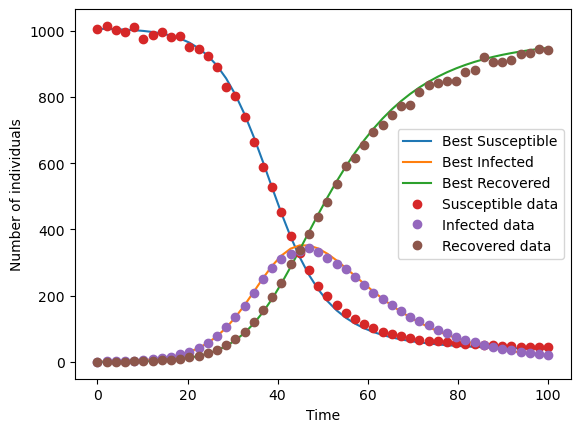

In [114]:
import optuna

def objective(trial: optuna.Trial) -> float:
	bet = trial.suggest_float("betta", 1e-4,1)
	gam = trial.suggest_float("gamma", 1e-4,1)
	sim = SIR_python.integrate_system(S0, I0, R0, bet, gam, dt,numsteps, return_every)
	N = S0 + I0 + R0
	return np.sum(
        ((sim[:,1] - S_data)/N)**2 +
        ((sim[:,2] - I_data)/N)**2 +
        ((sim[:,3] - R_data)/N)**2
    )

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=500);

best_betta = study.best_params["betta"]
best_gamma = study.best_params["gamma"]
print(f"Best betta: {best_betta}, Best gamma: {best_gamma}")
## plot data
best_sim = SIR_python.integrate_system(S0, I0, R0, best_betta, best_gamma, dt,numsteps, return_every)
plt.plot(best_sim[:,0], best_sim[:,1], label="Best Susceptible")
plt.plot(best_sim[:,0], best_sim[:,2], label="Best Infected")
plt.plot(best_sim[:,0], best_sim[:,3], label="Best Recovered")
plt.xlabel("Time")
plt.ylabel("Number of individuals")
plt.plot(time_data, S_data, "o", label="Susceptible data")
plt.plot(time_data, I_data, "o", label="Infected data")
plt.plot(time_data, R_data, "o", label="Recovered data")
plt.legend()
plt.show()

